# PyWeather

Observations:
1. Temperature correlates with latitude.  However, seasonal and alttitude effects bias data significantly.
2. Wind, Humidity, and Cloudiness do not strongly correlate with latitude.  This is expected since weather systems are driven by oceans and wind not just by closeness to the equator.
3.  Analysis is also limited by lack of data away from cities.  Extreme locations are not inhabited.

In [321]:
from citipy import citipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import openweathermapy.core as ow
import string
from datetime import datetime

#Generate random sites
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#Build dataframe
coord_pair_df =pd.DataFrame({'Latitude':lats, 'Longitude':lngs})
coord_pair_df["City"] = ""
coord_pair_df["Country"] = ""
coord_pair_df["Temperature"] = ""
coord_pair_df["Humidity (%)"] = ""
coord_pair_df["Cloudiness (%)"] = ""
coord_pair_df["Windspeed (mph)"] = ""

#Find nearest cities to sites
city_list = []    
for index, row in coord_pair_df.iterrows():    
    coord_pair_df.set_value(index, "City",citipy.nearest_city(coord_pair_df.get_value(index,'Latitude'),
                                                              coord_pair_df.get_value(index,'Latitude')).city_name.title())   
    coord_pair_df.set_value(index, "Country",citipy.nearest_city(coord_pair_df.get_value(index,'Latitude'),
                                                              coord_pair_df.get_value(index,'Latitude')).country_code.upper())

coord_pair_df['Temperature']=pd.to_numeric(coord_pair_df['Temperature'],errors='ignore')   

api_key = "c5fb704805aa5b73b4329adef01544c0"
settings = {"units": "imperial", "appid": api_key}

#Pull weather data from Openweathermap
count=0

for index, row in coord_pair_df.iterrows():
    count +=1
    try: 
        print(str(count) + "  Retrieving data for " + row['City']+"....")
        response = ow.get_current(row['City'], **settings)
        coord_pair_df.set_value(index, "Temperature", response['main']['temp'])
        coord_pair_df.set_value(index, "Humidity (%)", response['main']['humidity'])
        coord_pair_df.set_value(index, "Cloudiness (%)", response['clouds']['all'])
        coord_pair_df.set_value(index, "Windspeed (mph)", response['wind']['speed'])
    except:
        print("City not found")


1  Retrieving data for Arraial Do Cabo....
2  Retrieving data for Ardesen....
3  Retrieving data for Damietta....
4  Retrieving data for Chuy....
5  Retrieving data for Mar Del Plata....
6  Retrieving data for Duku....
7  Retrieving data for Georgetown....
8  Retrieving data for Ushuaia....
9  Retrieving data for Matay....
10  Retrieving data for Dikson....
11  Retrieving data for Georgetown....
12  Retrieving data for Yar-Sale....
13  Retrieving data for Port Said....
14  Retrieving data for Ushuaia....
15  Retrieving data for Yar-Sale....
16  Retrieving data for Ushuaia....
17  Retrieving data for Takoradi....
18  Retrieving data for Faya....
City not found
19  Retrieving data for Ushuaia....
20  Retrieving data for Ushuaia....
21  Retrieving data for Ushuaia....
22  Retrieving data for Cotonou....
23  Retrieving data for Ushuaia....
24  Retrieving data for Necochea....
25  Retrieving data for Pleshanovo....
26  Retrieving data for Belebey....
27  Retrieving data for Vila Velha....
2

211  Retrieving data for Ushuaia....
212  Retrieving data for Jalu....
City not found
213  Retrieving data for Urozhaynoye....
214  Retrieving data for Ushuaia....
215  Retrieving data for Rio Grande....
216  Retrieving data for Faya....
City not found
217  Retrieving data for Ushuaia....
218  Retrieving data for Mar Del Plata....
219  Retrieving data for Ushuaia....
220  Retrieving data for Arraial Do Cabo....
221  Retrieving data for Ushuaia....
222  Retrieving data for Arraial Do Cabo....
223  Retrieving data for Faya....
City not found
224  Retrieving data for Rocha....
225  Retrieving data for Lafia....
226  Retrieving data for Ushuaia....
227  Retrieving data for Dikson....
228  Retrieving data for Aleksandrov Gay....
229  Retrieving data for Dikson....
230  Retrieving data for Caravelas....
231  Retrieving data for Vila Velha....
232  Retrieving data for Ushuaia....
233  Retrieving data for Dromolaxia....
City not found
234  Retrieving data for Aleksandrov Gay....
235  Retrievin

420  Retrieving data for Uromi....
421  Retrieving data for Georgetown....
422  Retrieving data for Ushuaia....
423  Retrieving data for Georgetown....
424  Retrieving data for Georgetown....
425  Retrieving data for Ushuaia....
426  Retrieving data for Dikson....
427  Retrieving data for Matay....
428  Retrieving data for Cidreira....
429  Retrieving data for Dikson....
430  Retrieving data for Yar-Sale....
431  Retrieving data for Georgetown....
432  Retrieving data for Bayburt....
433  Retrieving data for Zenzeli....
434  Retrieving data for Ankpa....
435  Retrieving data for Ushuaia....
436  Retrieving data for Georgetown....
437  Retrieving data for Ushuaia....
438  Retrieving data for Arraial Do Cabo....
439  Retrieving data for Bauchi....
440  Retrieving data for Lysva....
441  Retrieving data for Dikson....
442  Retrieving data for Georgetown....
443  Retrieving data for Georgetown....
444  Retrieving data for Takoradi....
445  Retrieving data for Ushuaia....
446  Retrieving da

633  Retrieving data for Cidreira....
634  Retrieving data for Georgetown....
635  Retrieving data for Rocha....
636  Retrieving data for Rocha....
637  Retrieving data for Ushuaia....
638  Retrieving data for Ushuaia....
639  Retrieving data for Ushuaia....
640  Retrieving data for Dikson....
641  Retrieving data for Tambovka....
642  Retrieving data for Jalu....
City not found
643  Retrieving data for Port Said....
644  Retrieving data for Mar Del Plata....
645  Retrieving data for Rocha....
646  Retrieving data for Georgetown....
647  Retrieving data for Georgetown....
648  Retrieving data for Damaturu....
649  Retrieving data for Axim....
650  Retrieving data for Takoradi....
651  Retrieving data for Ushuaia....
652  Retrieving data for Ushuaia....
653  Retrieving data for Ushuaia....
654  Retrieving data for Georgetown....
655  Retrieving data for Aleksandrov Gay....
656  Retrieving data for Dikson....
657  Retrieving data for Yar-Sale....
658  Retrieving data for Diffa....
659  R

844  Retrieving data for Vila Velha....
845  Retrieving data for Georgetown....
846  Retrieving data for Dikson....
847  Retrieving data for Ushuaia....
848  Retrieving data for Matay....
849  Retrieving data for Dikson....
850  Retrieving data for Ushuaia....
851  Retrieving data for Faya....
City not found
852  Retrieving data for Cotonou....
853  Retrieving data for Georgetown....
854  Retrieving data for Arraial Do Cabo....
855  Retrieving data for Takoradi....
856  Retrieving data for Yar-Sale....
857  Retrieving data for Anloga....
858  Retrieving data for Takoradi....
859  Retrieving data for Ushuaia....
860  Retrieving data for Georgetown....
861  Retrieving data for Anloga....
862  Retrieving data for Lentekhi....
863  Retrieving data for Chuy....
864  Retrieving data for Dikson....
865  Retrieving data for Dikson....
866  Retrieving data for Dikson....
867  Retrieving data for Cidreira....
868  Retrieving data for Ushuaia....
869  Retrieving data for Dikson....
870  Retrievin

1054  Retrieving data for Chuy....
1055  Retrieving data for Mumford....
1056  Retrieving data for Ushuaia....
1057  Retrieving data for Ardesen....
1058  Retrieving data for Arraial Do Cabo....
1059  Retrieving data for Aleksandrov Gay....
1060  Retrieving data for Ushuaia....
1061  Retrieving data for Warri....
1062  Retrieving data for Ozinki....
1063  Retrieving data for Dikson....
1064  Retrieving data for Dikson....
1065  Retrieving data for Ushuaia....
1066  Retrieving data for Priyutovo....
1067  Retrieving data for Ushuaia....
1068  Retrieving data for Dikson....
1069  Retrieving data for Dikson....
1070  Retrieving data for El Faiyum....
City not found
1071  Retrieving data for Ushuaia....
1072  Retrieving data for Ushuaia....
1073  Retrieving data for Georgetown....
1074  Retrieving data for Dipkarpaz....
City not found
1075  Retrieving data for Arraial Do Cabo....
1076  Retrieving data for Georgetown....
1077  Retrieving data for Rocha....
1078  Retrieving data for Tartus..

1259  Retrieving data for Jalu....
City not found
1260  Retrieving data for Georgetown....
1261  Retrieving data for Vila Velha....
1262  Retrieving data for Dikson....
1263  Retrieving data for Ushuaia....
1264  Retrieving data for Georgetown....
1265  Retrieving data for Dikson....
1266  Retrieving data for Zenzeli....
1267  Retrieving data for Ushuaia....
1268  Retrieving data for Vila Velha....
1269  Retrieving data for Ushuaia....
1270  Retrieving data for Zachagansk....
City not found
1271  Retrieving data for Tunceli....
1272  Retrieving data for Yar-Sale....
1273  Retrieving data for Georgetown....
1274  Retrieving data for Malatya....
1275  Retrieving data for Ushuaia....
1276  Retrieving data for Ushuaia....
1277  Retrieving data for Ankpa....
1278  Retrieving data for Ushuaia....
1279  Retrieving data for Ushuaia....
1280  Retrieving data for Dikson....
1281  Retrieving data for Bayburt....
1282  Retrieving data for Matay....
1283  Retrieving data for Naruja....
1284  Retrie

1469  Retrieving data for Georgetown....
1470  Retrieving data for Vila Velha....
1471  Retrieving data for Matay....
1472  Retrieving data for Dikson....
1473  Retrieving data for Ushuaia....
1474  Retrieving data for Ushuaia....
1475  Retrieving data for Ushuaia....
1476  Retrieving data for Dikson....
1477  Retrieving data for Faya....
City not found
1478  Retrieving data for Duku....
1479  Retrieving data for Ushuaia....
1480  Retrieving data for Islahiye....
1481  Retrieving data for Georgetown....
1482  Retrieving data for Faya....
City not found
1483  Retrieving data for Yar-Sale....
1484  Retrieving data for Arraial Do Cabo....
1485  Retrieving data for Port Said....
1486  Retrieving data for Axim....
1487  Retrieving data for Ushuaia....
1488  Retrieving data for Mestia....
1489  Retrieving data for Kalya....
City not found
1490  Retrieving data for Arraial Do Cabo....
1491  Retrieving data for Georgetown....
1492  Retrieving data for Georgetown....
1493  Retrieving data for D

In [322]:
#Cleanup dataframe
coord_pair_df.drop_duplicates('City')
coord_pair_df.dropna(how ='any')

,Latitude,Longitude,City,Country,Temperature,Humidity (%),Cloudiness (%),Windspeed (mph)
0,-31.259131,-9.141725,Arraial Do Cabo,BR,76.17,84,36,18.37
1,41.263791,4.107261,Ardesen,TR,64.40,34,0,24.16
2,31.442604,160.842957,Damietta,EG,69.80,83,40,8.05
3,-44.380240,123.005466,Chuy,UY,47.91,93,0,8.63
4,-46.149022,1.740160,Mar Del Plata,AR,53.60,58,0,17.22
5,10.925641,144.628475,Duku,NG,69.15,65,8,2.59
6,-5.765429,117.415320,Georgetown,SH,73.40,94,0,4.7
7,-62.324092,-6.461982,Ushuaia,AR,33.80,100,90,24.16
8,28.371596,169.615412,Matay,EG,58.03,90,0,4.83
9,74.653902,27.006854,Dikson,RU,-2.36,100,20,18.7


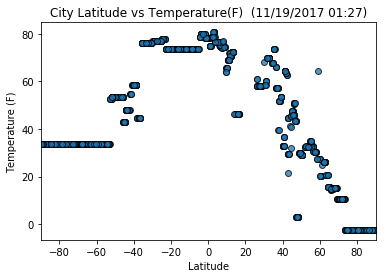

In [323]:
#Build plots
coord_pair_df.dropna(axis=0, how='any', inplace=True)

coord_pair_df.dtypes
coord_pair_df['Humidity (%)']=pd.to_numeric(coord_pair_df['Humidity (%)'],errors='ignore')
coord_pair_df['Cloudiness (%)']=pd.to_numeric(coord_pair_df['Cloudiness (%)'],errors='ignore')
coord_pair_df['Windspeed (mph)']=pd.to_numeric(coord_pair_df['Windspeed (mph)'],errors='ignore')


plt.scatter(coord_pair_df['Latitude'],coord_pair_df['Temperature'],alpha=0.75, edgecolor="black")
plt.title(f"City Latitude vs Temperature(F)  ({datetime.now().strftime('%m/%d/%Y %H:%M')})")
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()


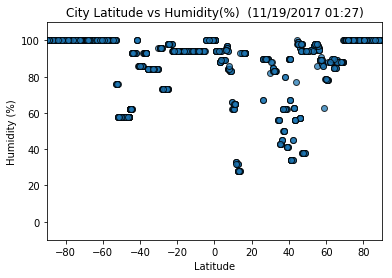

In [324]:
plt.scatter(coord_pair_df['Latitude'],coord_pair_df['Humidity (%)'],alpha=0.75, edgecolor="black")
plt.title(f"City Latitude vs Humidity(%)  ({datetime.now().strftime('%m/%d/%Y %H:%M')})")
plt.xlim(-90,90)
plt.ylim(-10,110)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

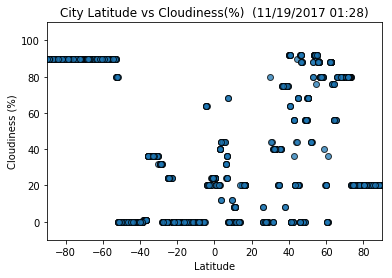

In [325]:
plt.scatter(coord_pair_df['Latitude'],coord_pair_df['Cloudiness (%)'],alpha=0.75, edgecolor="black")
plt.title(f"City Latitude vs Cloudiness(%)  ({datetime.now().strftime('%m/%d/%Y %H:%M')})")
plt.xlim(-90,90)
plt.ylim(-10,110)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

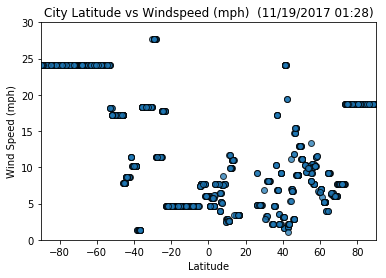

In [326]:
plt.scatter(coord_pair_df['Latitude'],coord_pair_df['Windspeed (mph)'],alpha=0.75, edgecolor="black")
plt.title(f"City Latitude vs Windspeed (mph)  ({datetime.now().strftime('%m/%d/%Y %H:%M')})")
plt.xlim(-90,90)
plt.ylim(0,30)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()


In [327]:
#Write to csv
coord_pair_df.to_csv("weather.csv", index=False, header=True)